# Data Handling

In [263]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [264]:
# Directory containing CSV files
csv_dir = "ResaleFlatPrices"
csv_files = [f for f in os.listdir(csv_dir) if f.endswith(".csv")]

In [265]:
# Read all CSVs into a dictionary of DataFrames
dataframes = {file: pd.read_csv(os.path.join(csv_dir, file)) for file in csv_files}

In [266]:
dataframes

{'Resale flat prices based on registration date from Jan-2017 onwards.csv':           month        town  flat_type block        street_name storey_range  \
 0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
 1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
 2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
 3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
 4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
 ...         ...         ...        ...   ...                ...          ...   
 201162  2025-02      YISHUN  EXECUTIVE   364     YISHUN RING RD     01 TO 03   
 201163  2025-02      YISHUN  EXECUTIVE   328     YISHUN RING RD     01 TO 03   
 201164  2025-02      YISHUN  EXECUTIVE   723       YISHUN ST 71     07 TO 09   
 201165  2025-02      YISHUN  EXECUTIVE   824       YISHUN ST 81     01 TO 03   
 201166  2025-02      YISHUN  EXEC

In [267]:
data_df = pd.DataFrame(columns=["File", "total_columns", "missing_columns"])

In [268]:
all_columns = set(dataframes[next(iter(dataframes))].columns)

In [269]:
rows = []
for key, val in dataframes.items():
    missing_columns = all_columns - set(val.columns)
    rows.append([key, val.shape, *list(missing_columns)])
data_df = pd.DataFrame(rows, columns=data_df.columns)
print(data_df)

                                                File total_columns  \
0  Resale flat prices based on registration date ...  (201167, 11)   
1  Resale Flat Prices (Based on Registration Date...   (52203, 10)   
2  Resale Flat Prices (Based on Approval Date), 1...  (287196, 10)   
3  Resale Flat Prices (Based on Registration Date...   (37153, 11)   
4  Resale Flat Prices (Based on Approval Date), 2...  (369651, 10)   

   missing_columns  
0             None  
1  remaining_lease  
2  remaining_lease  
3             None  
4  remaining_lease  


In [270]:
temp_df = pd.DataFrame()
for index, row in data_df.iterrows():
    if data_df.loc[index,"missing_columns"] is None:
        file = data_df.loc[index,"File"]
        temp_df = pd.concat([temp_df, dataframes[file]])
        print(file)


Resale flat prices based on registration date from Jan-2017 onwards.csv
Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv


In [271]:
temp_df.reset_index(drop= True, inplace= True)
temp_df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [272]:
temp_df.shape

(238320, 11)

In [273]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238320 entries, 0 to 238319
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                238320 non-null  object 
 1   town                 238320 non-null  object 
 2   flat_type            238320 non-null  object 
 3   block                238320 non-null  object 
 4   street_name          238320 non-null  object 
 5   storey_range         238320 non-null  object 
 6   floor_area_sqm       238320 non-null  float64
 7   flat_model           238320 non-null  object 
 8   lease_commence_date  238320 non-null  int64  
 9   remaining_lease      238320 non-null  object 
 10  resale_price         238320 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.0+ MB


In [274]:
temp_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## Data Handling

In [275]:
temp_df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [276]:
temp_df["month"] = pd.to_datetime(temp_df["month"], format="%Y-%m")

In [277]:
# now splitting the month column to day, month & year:
temp_df["year"] = temp_df["month"].dt.year
temp_df["month"] = temp_df["month"].dt.month

In [278]:
def uniq(df_col_name):
    col_name = df_col_name.unique()
    length = df_col_name.nunique() # len(col_name)
    print(length, col_name)
    return

In [279]:
temp_df["year"].value_counts().index.sort_values()

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int32', name='year')

In [280]:
uniq(temp_df["town"])

26 ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']


In [281]:
uniq(temp_df["flat_type"])

7 ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']


In [282]:
uniq(temp_df["flat_model"])

21 ['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'
 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'
 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']


In [283]:
uniq(temp_df["storey_range"])

17 ['10 TO 12' '01 TO 03' '04 TO 06' '07 TO 09' '13 TO 15' '19 TO 21'
 '22 TO 24' '16 TO 18' '34 TO 36' '28 TO 30' '37 TO 39' '49 TO 51'
 '25 TO 27' '40 TO 42' '31 TO 33' '46 TO 48' '43 TO 45']


In [284]:
uniq(temp_df["floor_area_sqm"])

181 [ 44.   67.   68.   73.   74.   82.   81.   92.   91.   94.   98.   97.
  99.   90.  117.  119.  118.  112.  121.  147.   45.   59.   63.   70.
  60.   65.   75.   66.   84.   93.  104.  105.  120.  130.  132.  115.
 122.  137.  139.  143.  146.  145.  141.   64.   83.  108.   95.  123.
  69.  103.  102.  100.  107.   86.  101.  150.  155.  144.   34.   51.
  54.   58.   76.   88.   77.  106.   85.   89.  134.  110.  111.  151.
  55.  113.  126.  124.  131.  142.   42.   46.   56.   61.   57.   72.
 109.   47.   96.  116.  128.  140.  148.  156.  157.   71.   52.   79.
 129.  133.  125.   48.   62.  114.   87.  127.  161.  165.   50.  153.
  43.  138.  164.  163.  136.  149.   80.  154.  152.   37.   78.  135.
 170.  192.  182.   31.   49.   53.   60.3 176.  177.  189.   40.  166.
 184.  173.  169.  181.  158.   41.  159.  215.  174.   63.1 179.  162.
  83.1 172.  168.  160.  249.  185.   38.  178.  171.  237.  183.  190.
 175.  188.  187.   35.  186.   39.  243.  222.  167.  210. 

In [285]:
# Storey range has range type value so splitting and dropping it
temp_df[["storey_start", "storey_end"]] = temp_df["storey_range"].str.split(" TO ", expand= True)
temp_df.drop(columns= "storey_range", inplace= True)


In [286]:
# creating a new column 'address' by using 'block' + 'street_name' and remove that unused columns.
# we might add Town but town has influence on pricing but block with street name is less. So, keeping the separate
temp_df["address"] = temp_df["block"] +", "+ temp_df["street_name"]
temp_df.drop(["block", "street_name"], axis=1, inplace=True)

In [287]:
temp_df.head(3)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,storey_start,storey_end,address
0,1,ANG MO KIO,2 ROOM,44.0,Improved,1979,61 years 04 months,232000.0,2017,10,12,"406, ANG MO KIO AVE 10"
1,1,ANG MO KIO,3 ROOM,67.0,New Generation,1978,60 years 07 months,250000.0,2017,01,03,"108, ANG MO KIO AVE 4"
2,1,ANG MO KIO,3 ROOM,67.0,New Generation,1980,62 years 05 months,262000.0,2017,01,03,"602, ANG MO KIO AVE 5"


## Data Encoding

In [288]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [289]:
# Using LabelEncoder for town and address because it can not be ordered in any manner,
temp_df["town"] = LabelEncoder().fit_transform(temp_df["town"])
temp_df["address"]= LabelEncoder().fit_transform(temp_df["address"])

In [290]:
# Using OrdinalEncoder for 'flat_model' and 'flat_type' because those can be ordered
temp_df["flat_type"] = OrdinalEncoder().fit_transform(temp_df[["flat_type"]])
temp_df["flat_model"] = OrdinalEncoder().fit_transform(temp_df[["flat_model"]])

In [291]:
temp_df.dtypes


month                    int32
town                     int64
flat_type              float64
floor_area_sqm         float64
flat_model             float64
lease_commence_date      int64
remaining_lease         object
resale_price           float64
year                     int32
storey_start            object
storey_end              object
address                  int64
dtype: object

In [292]:
temp_df["storey_end"] = temp_df["storey_end"].astype("int")
temp_df["storey_start"] = temp_df["storey_start"].astype("int")

In [293]:
temp_df["remaining_lease"]

0         61 years 04 months
1         60 years 07 months
2         62 years 05 months
3          62 years 01 month
4         62 years 05 months
                 ...        
238315                    82
238316                    69
238317                    74
238318                    70
238319                    70
Name: remaining_lease, Length: 238320, dtype: object

In [294]:
# by seeing the above data we can split it into desired format:
slice_values= []
for i in temp_df["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [295]:
df_data = pd.DataFrame(slice_values, columns=["remaining_lease_year", "remaining_lease_month"])

In [296]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [297]:
#droping the "remaining_lease" column
temp_df.drop(columns=["remaining_lease"],inplace= True)

In [298]:
temp_df = pd.concat([temp_df, df_data], axis=1)

In [299]:
temp_df = temp_df.drop_duplicates()
temp_df = temp_df.sort_values(by= ["year", "month"])
temp_df = temp_df.reset_index(drop=True)

In [300]:
temp_df.isnull().sum()

month                    0
town                     0
flat_type                0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
year                     0
storey_start             0
storey_end               0
address                  0
remaining_lease_year     0
remaining_lease_month    0
dtype: int64

<Axes: >

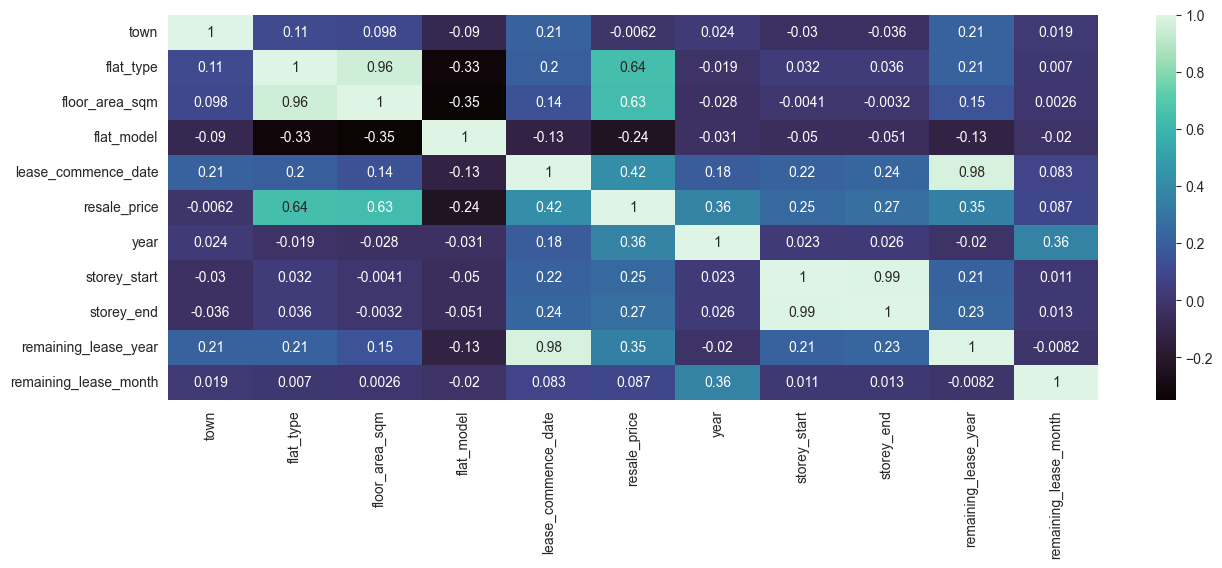

In [339]:
import matplotlib.pyplot as plt
df_corr = temp_df.corr()

plt.figure(figsize = [15.0, 5.0])
sns.heatmap(df_corr, annot= True, cmap="mako", fmt= '.2g')

In [302]:
temp_df.duplicated().sum()

np.int64(0)

In [303]:
temp_df= temp_df.drop_duplicates()
temp_df.reset_index(drop= True, inplace= True)

In [304]:
temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,237999.0,6.566939,3.420320,1.0,4.0,7.0,9.0,12.0
town,237999.0,13.901802,7.954648,0.0,8.0,14.0,21.0,25.0
flat_type,237999.0,3.114996,0.919585,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,237999.0,96.970477,24.061523,31.0,81.0,93.0,112.0,366.7
flat_model,237999.0,8.679377,3.636247,0.0,5.0,8.0,12.0,20.0
lease_commence_date,237999.0,1995.399624,13.844026,1966.0,1985.0,1996.0,2006.0,2021.0
resale_price,237999.0,499368.999991,175215.126051,140000.0,370000.0,465000.0,598000.0,1600000.0
year,237999.0,2019.997059,2.871581,2015.0,2018.0,2020.0,2022.0,2025.0
storey_start,237999.0,7.664099,5.853118,1.0,4.0,7.0,10.0,49.0
storey_end,237999.0,9.664099,5.853118,3.0,6.0,9.0,12.0,51.0


### skewness handling

In [305]:
import warnings
warnings.filterwarnings("ignore")

In [333]:
def plot(df, column):
    sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.figure(figsize=(9, 2.4))  # Increased size by 20%

    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True, color='skyblue', bins=20)
    plt.title(column + ' dist plot')

    plt.subplot(1, 3, 2)
    sns.histplot(df[column], kde=True, color='lightcoral', bins=30)
    plt.title(column + " Histogram plot ")

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(column + " Box plot")

    plt.tight_layout()
    plt.show()

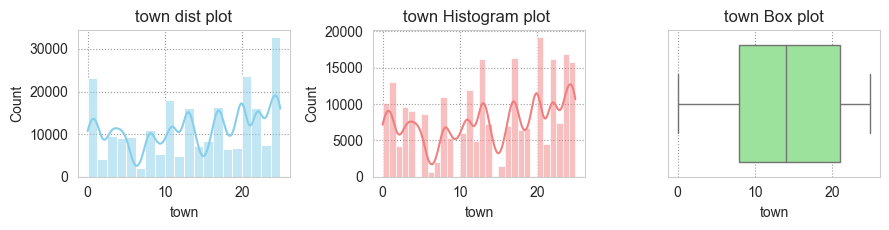

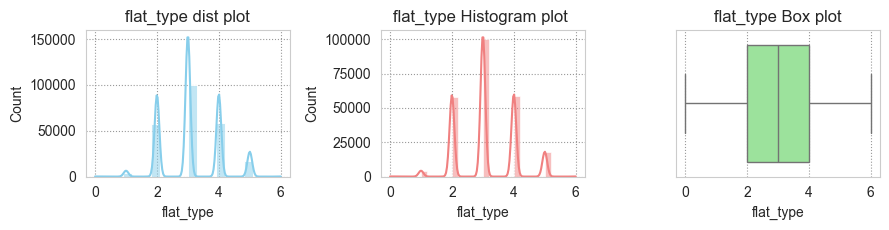

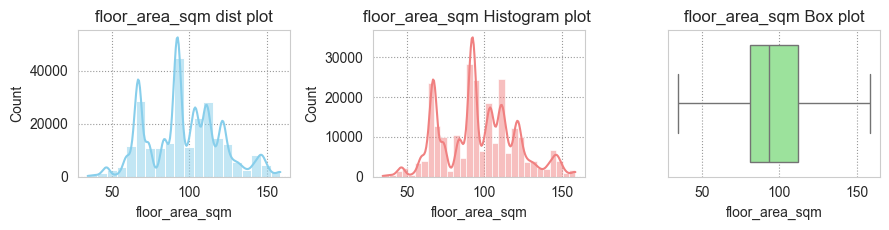

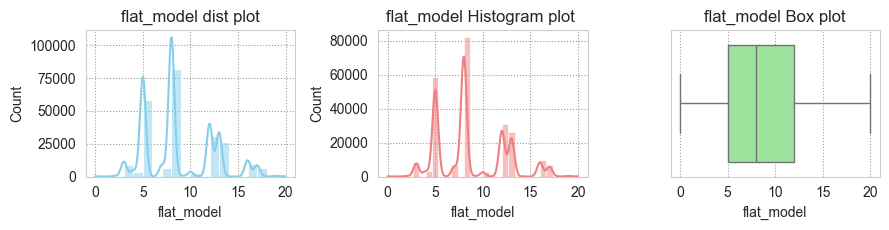

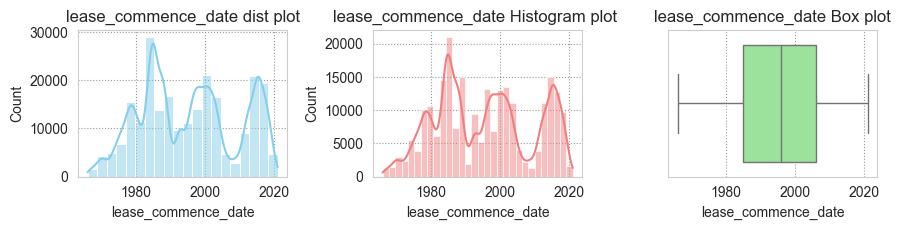

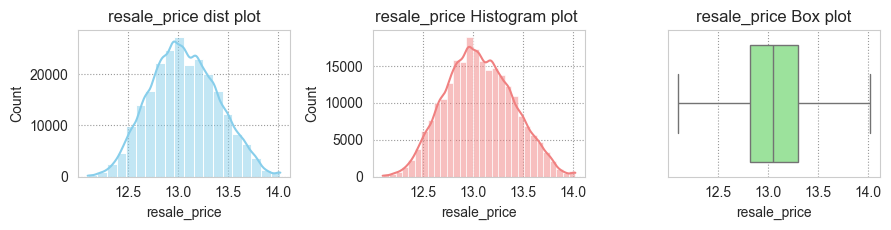

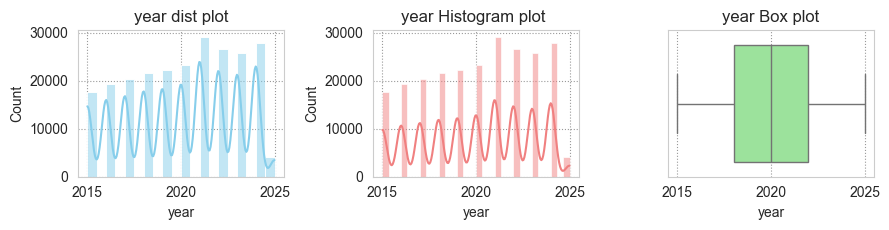

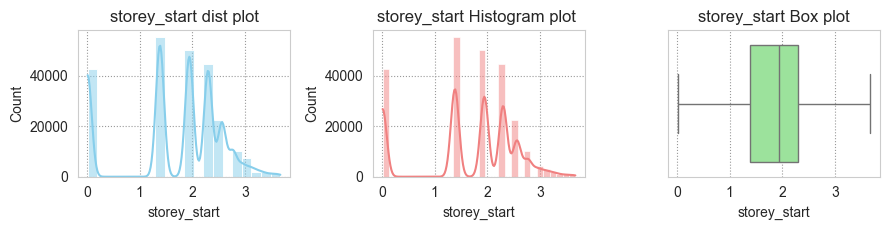

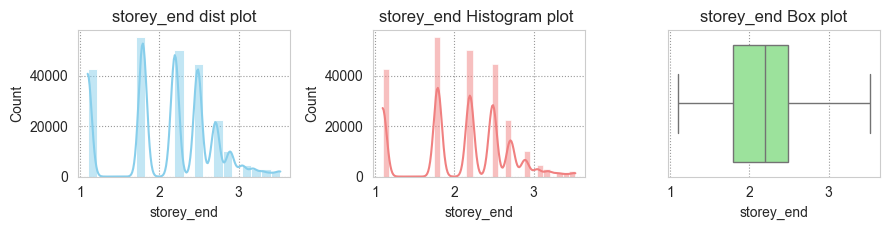

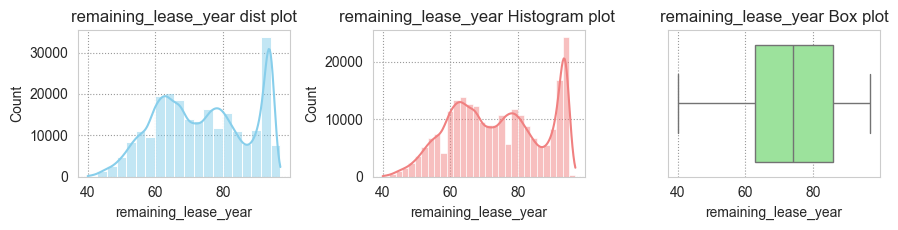

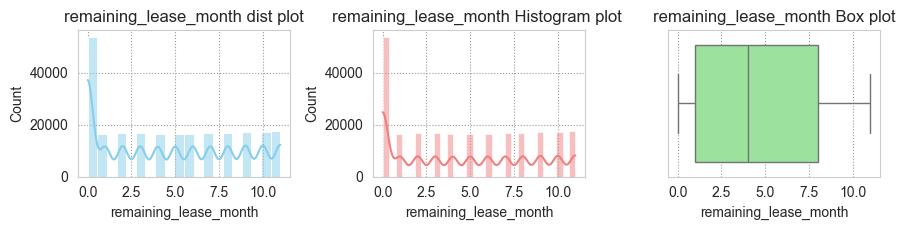

In [334]:
for i in temp_df.columns:
    plot(temp_df, i)

In [308]:
temp_df["storey_start"] = np.log(temp_df["storey_start"])
temp_df["storey_end"] = np.log(temp_df["storey_end"])
temp_df["resale_price"] = np.log(temp_df["resale_price"])

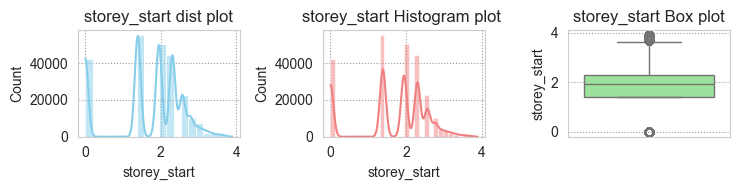

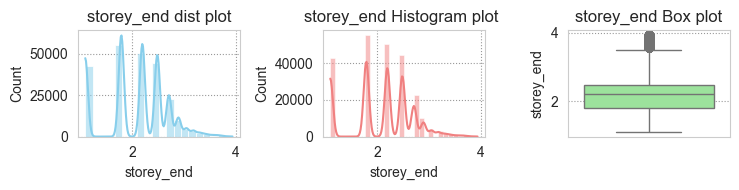

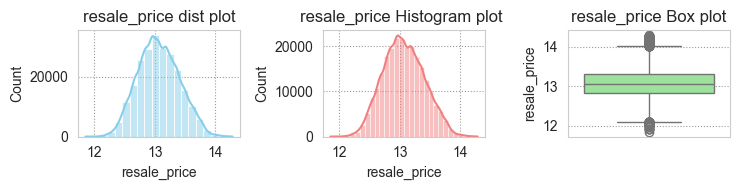

In [309]:
skewed_columns = ["storey_start", "storey_end", "resale_price"]
for i in skewed_columns:
    plot(temp_df, i)

### Handling outliers

### Identified Outlier Columns
1. **floor_area_sqm**
2. **storey_start**
3. **storey_end**
4. **resale_price**

In [310]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [311]:
outlier_columns = ['floor_area_sqm', 'storey_start', 'storey_end', 'resale_price']
for j in outlier_columns:
    outlier(temp_df, j)

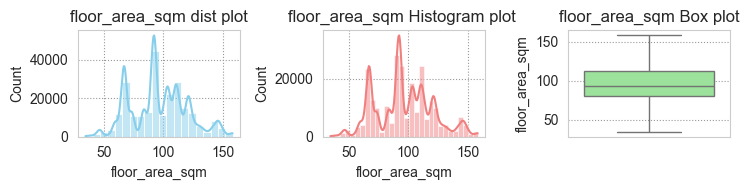

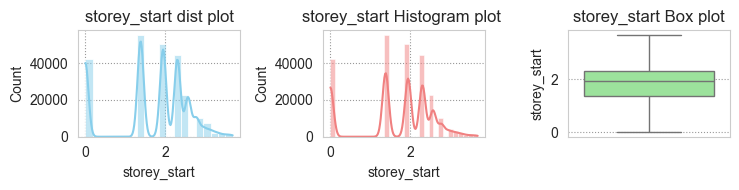

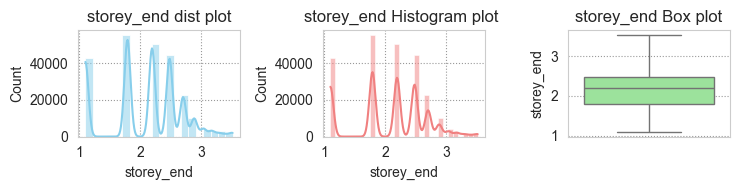

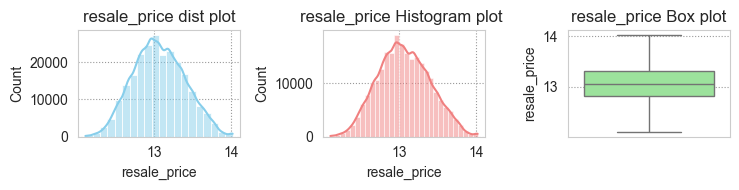

In [312]:
for k in outlier_columns:
    plot(temp_df,k)

### Correlation after outliers

<Axes: >

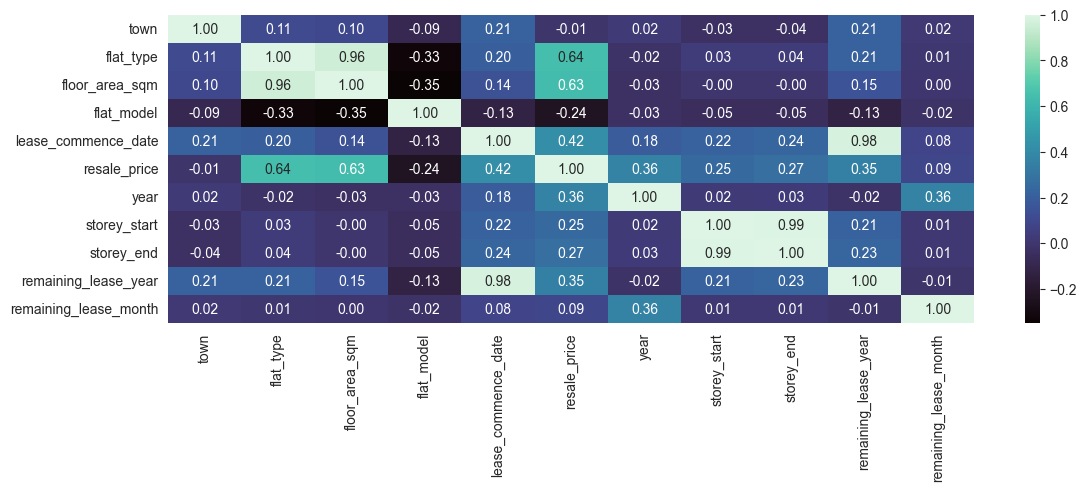

In [340]:
final_df4_corr = temp_df.corr()
plt.figure(figsize= (13, 4))
sns.heatmap(final_df4_corr, annot= True,cmap= 'mako', fmt= "0.2f")

In [314]:
# 'Address' column and 'month' column has lss influence on other columns. Very less correlation. so removing those columns.
temp_df.drop(columns=["address", "month"], inplace= True)

In [315]:
temp_df.head(3)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,0,2.0,60.0,5.0,1986,12.449019,2015,1.945910,2.197225,70,0
1,0,2.0,68.0,12.0,1981,12.524526,2015,0.011858,1.098612,65,0
2,0,2.0,69.0,12.0,1980,12.560244,2015,0.011858,1.098612,64,0


### Model Training

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [317]:
x= temp_df.drop(columns=["resale_price"])
y= temp_df["resale_price"]

In [318]:
x.tail(2)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
237997,25,5.0,145.0,3.0,1987,2025,0.011858,1.098612,61,10
237998,25,5.0,146.0,7.0,1988,2025,2.302585,2.484907,62,0


In [319]:
x.columns

Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'year', 'storey_start', 'storey_end',
       'remaining_lease_year', 'remaining_lease_month'],
      dtype='object')

In [320]:
y.tail(2)

237997    13.674970
237998    13.911628
Name: resale_price, dtype: float64

In [321]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [322]:
model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

In [323]:
test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

In [324]:
metrics_test={
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Name': 'RandomForestRegressor', 'R2_score': 0.9574194112314514, 'Mean_squared_error': 0.004882426970349861, 'Root_mean_squared_error': np.float64(0.06987436561679727), 'Mean_absolute_error': 0.05124143744494559}


In [325]:
# test predication
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)

In [326]:
y_pred_1[0]

np.float64(12.285108649968704)

### Saving the model

In [327]:
import pickle
filename = 'RTR_model'
filepath = f"model_data/{filename}.pkl"
with open(filepath, 'wb') as file:
    pickle.dump(model_1, file)
print(f"saved {filename}.pkl")

saved RTR_model.pkl


In [336]:
def prediction(input_data: list):
    in_data = np.array([input_data])
    price_pred = model_1.predict(in_data)
    result_output = np.exp(price_pred[0]) # converting back to numbers
    print(round(result_output))

In [337]:
prediction([1,0,2.0,60.0,5.0,1986,2015,1.9459101490553132,2.1972245773362196,1658])
# Actual ans: 12.449018824140563

213608


In [338]:
prediction([1,0,2.0,68.0,12.0,1981,2015,0.011858263308657468,1.0986122886681098,6634])
# Actual ans: 12.524526376648708

211666
